In [14]:
!pip install ta


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=eaa8faab2db5ec31b8be6137bf17d8726cde696651562e13c2f9feb7c2cc156c
  Stored in directory: c:\users\harol\appdata\local\pip\cache\wheels\61\d8\66\8018676d483fa5edb5337a7a25ee8c029ac255be25f90f3cd5
Successfully built ta


In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import MACD


In [2]:
# Load Apple stock data
df = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
df.dropna(inplace=True)

# Display first few rows
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


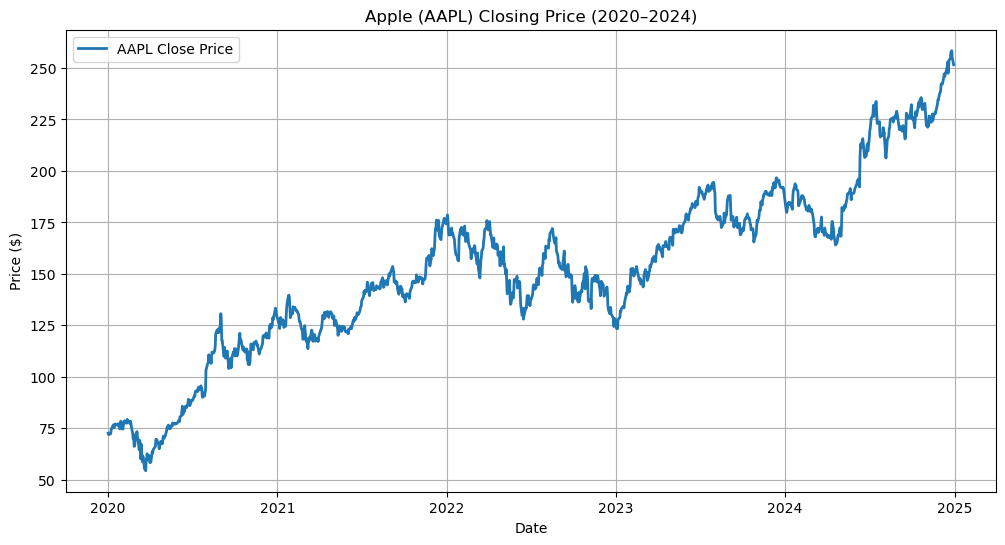

In [8]:

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='AAPL Close Price', linewidth=2)
plt.title("Apple (AAPL) Closing Price (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


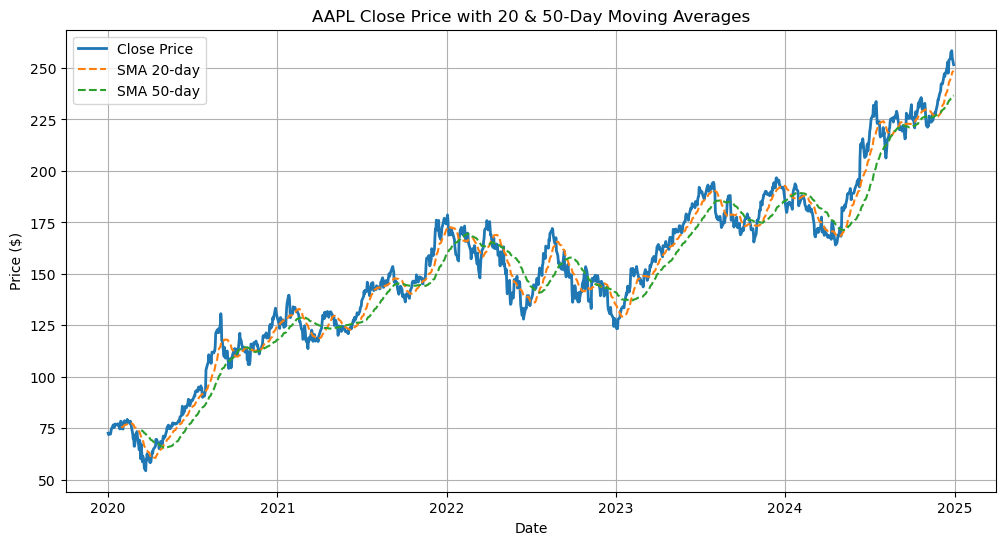

In [9]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', linewidth=2)
plt.plot(df['SMA20'], label='SMA 20-day', linestyle='--')
plt.plot(df['SMA50'], label='SMA 50-day', linestyle='--')
plt.title("AAPL Close Price with 20 & 50-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


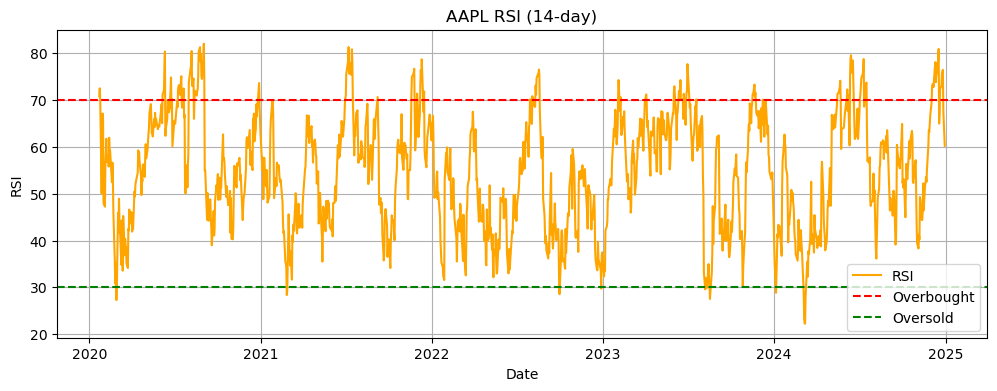

In [19]:

rsi = RSIIndicator(close=df['Close'].squeeze(), window=14)
df['RSI'] = rsi.rsi()

plt.figure(figsize=(12, 4))
plt.plot(df['RSI'], label='RSI', color='orange')
plt.axhline(70, linestyle='--', color='red', label='Overbought')
plt.axhline(30, linestyle='--', color='green', label='Oversold')
plt.title("AAPL RSI (14-day)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.show()


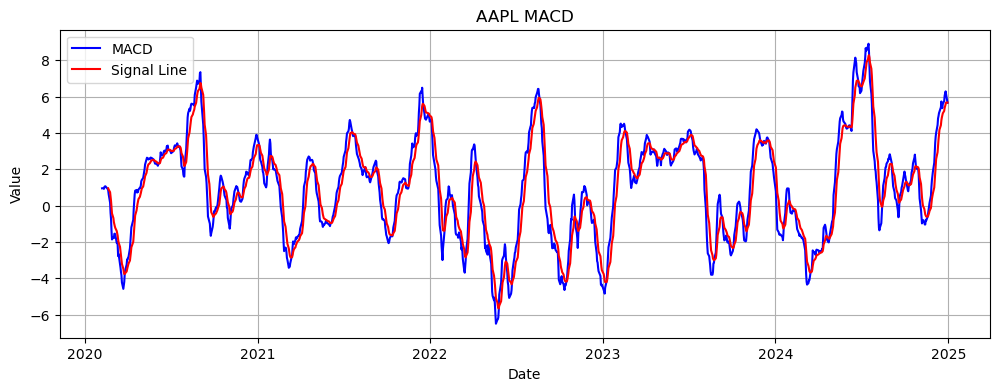

In [21]:

macd = MACD(close=df['Close'].squeeze())
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

plt.figure(figsize=(12, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal Line', color='red')
plt.title("AAPL MACD")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Shift the 'Close' column by -1 to get next day's price
df['Close_Next_Day'] = df['Close'].shift(-1)

# Create the target column
df['Target'] = (df['Close_Next_Day'] > df['Close']).astype(int)

# 1 = Up, 0 = Down
df['Target_Label'] = df['Target'].map({1: 'Up', 0: 'Down'})

# Drop the last row since it has NaN in Close_Next_Day
df.dropna(inplace=True)

# Preview
df[['Close', 'Close_Next_Day', 'Target', 'Target_Label']].head()


C:\Users\harol\AppData\Local\Temp\ipykernel_3716\274705711.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df['Target'] = (df['Close_Next_Day'] > df['Close']).astype(int)


ValueError: Expected a 1D array, got an array with shape (1257, 1258)

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, AAPL)       1257 non-null   float64
 1   (High, AAPL)        1257 non-null   float64
 2   (Low, AAPL)         1257 non-null   float64
 3   (Open, AAPL)        1257 non-null   float64
 4   (Volume, AAPL)      1257 non-null   int64  
 5   (SMA20, )           1238 non-null   float64
 6   (SMA50, )           1208 non-null   float64
 7   (RSI, )             1244 non-null   float64
 8   (MACD, )            1232 non-null   float64
 9   (MACD_Signal, )     1224 non-null   float64
 10  (Close_Next_Day, )  1256 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 117.8 KB


<bound method NDFrame._add_numeric_operations.<locals>.sum of Price       Close   High    Low   Open Volume  SMA20  SMA50    RSI   MACD  \
Ticker       AAPL   AAPL   AAPL   AAPL   AAPL                               
Date                                                                        
2020-01-02  False  False  False  False  False   True   True   True   True   
2020-01-03  False  False  False  False  False   True   True   True   True   
2020-01-06  False  False  False  False  False   True   True   True   True   
2020-01-07  False  False  False  False  False   True   True   True   True   
2020-01-08  False  False  False  False  False   True   True   True   True   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2024-12-23  False  False  False  False  False  False  False  False  False   
2024-12-24  False  False  False  False  False  False  False  False  False   
2024-12-26  False  False  False  False  False  False  False  False  False   
2024-12-27  Fa